In [1]:
# imports
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import sys, os
sys.path.insert(0, os.path.dirname(os.getcwd()))
sys.path.insert(0,os.getcwd())
os.chdir("..")
from gwu_nn.gwu_network import GWUNetwork
from gwu_nn.layers import Dense
from gwu_nn.activation_layers import Sigmoid

In [25]:
statistics = {
   "titanic": {
    "GD": {},
    "SGD": {},
    "SGD w/ momentum": {},
    "RMSprop":{},
    "Adagrad":{},
    "ADAM":{},
    "GD_100": 0,
    "GD_100_Normalized": 0,
    "SGD_100": 0,
    "SGD_100_Normalized": 0,
    "SGD_momentum_100":0,
    "SGD_momentum_100_Normalized":0,
    "ADAM_100": 0,
    "ADAM_100_Normalized": 0,
    "RMSprop_100": 0,
    "RMSprop_100_Normalized": 0,
    "Adagrad_100":0,
    "Adagrad_100_Normalized":0                              
   },
  "mushroom": {
    "GD": {},
    "SGD": {},
    "RMSprop":{},
    "Adagrad":{},
    "SGD w/ momentum": {},
    "ADAM":{},
    "GD_100": 0,
    "GD_100_Normalized": 0,
    "SGD_100": 0,
    "SGD_100_Normalized": 0,
    "SGD_momentum_100":0,
    "SGD_momentum_100_Normalized":0,
    "ADAM_100": 0,
    "ADAM_100_Normalized": 0,
    "RMSprop_100": 0,
    "RMSprop_100_Normalized": 0,
    "Adagrad_100":0,
    "Adagrad_100_Normalized":0
  }
}

## Titanic Data

### Preprocessing data

In [3]:
y_col = 'Survived'
x_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = pd.read_csv('examples/data/titanic_data.csv')
y = np.array(df[y_col]).reshape(-1, 1)
orig_X = df[x_cols]

# Lets standardize our features
scaler = preprocessing.StandardScaler()
stand_X = scaler.fit_transform(orig_X)
X = stand_X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
random_seed_1 = random.randint(0, 2**32 - 1)
random_seed_2 = random.randint(0, 2**32 - 1)
random_seed_3 = random.randint(0, 2**32 - 1)

### Gradient Descent (batch_size = entire dataset size)

In [5]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)

start = time.time()
network.fit(X_train, y_train, optimizer="GD",batch_size=X.shape[0], epochs=100)
end = time.time()
tot_time = end - start
print("Time for GD in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for GD %s"%(tot_loss))

# Saving paramters to display later
statistics["titanic"]["GD"]["time"] = tot_time
statistics["titanic"]["GD"]["loss"] = tot_loss

epoch 10/100   error=0.9615425295639327
epoch 20/100   error=1.1406889368707904
epoch 30/100   error=1.1760647090269856
epoch 40/100   error=1.1846206346875956
epoch 50/100   error=1.1849418050241076
epoch 60/100   error=1.1851905731368224
epoch 70/100   error=1.187375280822277
epoch 80/100   error=1.1875246262788972
epoch 90/100   error=1.187640439783172
Time for GD in seconds 0.4829988479614258
Total loss for GD 1.2704053064398837


In [7]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="ADAM",batch_size=10, epochs=100)
end = time.time()
tot_time = end - start
print("Time for ADAM in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for ADAM %s"%(tot_loss))

# Saving paramters to display later
statistics["titanic"]["ADAM"]["time"] = tot_time
statistics["titanic"]["ADAM"]["loss"] = tot_loss

epoch 10/100   error=0.7133192842608067
epoch 20/100   error=0.7159407208558769
epoch 30/100   error=0.7198435937515378
epoch 40/100   error=0.7195220254807965
epoch 50/100   error=0.7191512960631804
epoch 60/100   error=0.7200177395038511
epoch 70/100   error=0.7206524395040345
epoch 80/100   error=0.7205383771740737
epoch 90/100   error=0.7207880350818074
Time for ADAM in seconds 1.7600297927856445
Total loss for ADAM 0.7240504839452729


In [8]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="SGD",batch_size=10, epochs=100)
end = time.time()
tot_time = end - start
print("Time for SGD in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for SGD %s"%(tot_loss))

# Saving paramters to display later
statistics["titanic"]["SGD"]["time"] = tot_time
statistics["titanic"]["SGD"]["loss"] = tot_loss

epoch 10/100   error=0.6968612833600604
epoch 20/100   error=0.6923293570695456
epoch 30/100   error=0.6969077769872544
epoch 40/100   error=0.6899985147675723
epoch 50/100   error=0.6926313850634956
epoch 60/100   error=0.6886821840726348
epoch 70/100   error=0.6982289925067399
epoch 80/100   error=0.6910699948642952
epoch 90/100   error=0.6938984243321001
Time for SGD in seconds 1.6316745281219482
Total loss for SGD 0.7086356000255182


In [11]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="SGD w/ momentum",batch_size=10, epochs=100)
end = time.time()
tot_time = end - start
print("Time for SGD w/ momentum in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for SGD w/ momentum %s"%(tot_loss))

# Saving paramters to display later
statistics["titanic"]["SGD w/ momentum"]["time"] = tot_time
statistics["titanic"]["SGD w/ momentum"]["loss"] = tot_loss

epoch 10/100   error=0.6888477918949508
epoch 20/100   error=0.6915712924913171
epoch 30/100   error=0.6922662170511783
epoch 40/100   error=0.6993312254790647
epoch 50/100   error=0.6992977879640433
epoch 60/100   error=0.7019199063148948
epoch 70/100   error=0.7094894986506498
epoch 80/100   error=0.7111358880163224
epoch 90/100   error=0.7149998028727902
Time for SGD w/ momentum in seconds 1.590998649597168
Total loss for SGD w/ momentum 0.7269591171558903


In [12]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="Adadelta",batch_size=10, epochs=100)
end = time.time()
tot_time = end - start
print("Time for Adadelta in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for Adagrad %s"%(tot_loss))

# Saving paramters to display later
statistics["titanic"]["Adagrad"]["time"] = tot_time
statistics["titanic"]["Adagrad"]["loss"] = tot_loss

epoch 10/100   error=0.6881905133373132
epoch 20/100   error=0.6896468474527606
epoch 30/100   error=0.6958018163421501
epoch 40/100   error=0.6973964144665206
epoch 50/100   error=0.6982592992710756
epoch 60/100   error=0.7022969810254139
epoch 70/100   error=0.7043634413551518
epoch 80/100   error=0.7055827130172112
epoch 90/100   error=0.7054029491551739
Time for Adadelta in seconds 1.7999992370605469
Total loss for Adagrad 0.7118702170964837


In [13]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="RMSprop",batch_size=10, epochs=100)
end = time.time()
tot_time = end - start
print("Time for RMSprop in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for RMSprop %s"%(tot_loss))

# Saving paramters to display later
statistics["titanic"]["RMSprop"]["time"] = tot_time
statistics["titanic"]["RMSprop"]["loss"] = tot_loss

epoch 10/100   error=0.6888571295396324
epoch 20/100   error=0.6894285918807372
epoch 30/100   error=0.6903691391310339
epoch 40/100   error=0.6953378368081787
epoch 50/100   error=0.6960488688401599
epoch 60/100   error=0.6991663298900045
epoch 70/100   error=0.6992763112295118
epoch 80/100   error=0.7019256489511628
epoch 90/100   error=0.7035941394781823
Time for RMSprop in seconds 1.7364051342010498
Total loss for RMSprop 0.7153596622100046


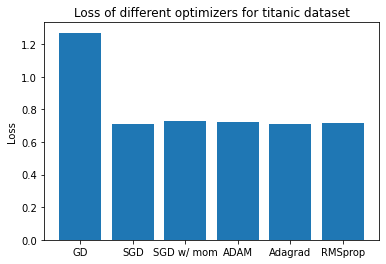

In [17]:
fig, ax = plt.subplots()

optimiziers = ['GD', 'SGD', 'SGD w/ mom', 'ADAM', 'Adagrad', 'RMSprop']
counts = [statistics["titanic"]["GD"]["loss"], 
          statistics["titanic"]["SGD"]["loss"], 
          statistics["titanic"]["SGD w/ momentum"]["loss"], 
          statistics["titanic"]["ADAM"]["loss"], 
          statistics["titanic"]["Adagrad"]["loss"], 
          statistics["titanic"]["RMSprop"]["loss"]]
# bar_labels = ['Gradient Descent', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(optimiziers, counts)

ax.set_ylabel('Loss')
ax.set_title('Loss of different optimizers for titanic dataset')

plt.show()

In [18]:
print(random_seed_1)
print(random_seed_2)
print(random_seed_3)

1483893774
2504520786
3768466173


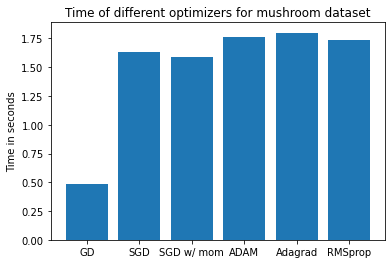

In [22]:
fig, ax = plt.subplots()

optimiziers = ['GD', 'SGD', 'SGD w/ mom', 'ADAM', 'Adagrad', 'RMSprop']
counts = [statistics["titanic"]["GD"]["time"], 
          statistics["titanic"]["SGD"]["time"], 
          statistics["titanic"]["SGD w/ momentum"]["time"], 
          statistics["titanic"]["ADAM"]["time"], 
          statistics["titanic"]["Adagrad"]["time"], 
          statistics["titanic"]["RMSprop"]["time"]]
# bar_labels = ['Gradient Descent', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(optimiziers, counts)

ax.set_ylabel('Time in seconds')
ax.set_title('Time of different optimizers for mushroom dataset')

plt.show()

## Aggregate Data Collection

In [ ]:
import sys
save_stdout = sys.stdout
sys.stdout = open('trash', 'w')
for x in range(0, 100):
    
    random_seed_1 = random.randint(0, 2**32 - 1)
    random_seed_2 = random.randint(0, 2**32 - 1)
    random_seed_3 = random.randint(0, 2**32 - 1)

    
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="GD",batch_size=X.shape[0], epochs=100)
    tot_loss_GD = network.evaluate(X_test, y_test)
    
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="SGD",batch_size=1, epochs=100)
    tot_loss_SGD = network.evaluate(X_test, y_test)
        
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="SGD w/ momentum",batch_size=1, epochs=100)
    tot_loss_SGD_momentum = network.evaluate(X_test, y_test)

    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="ADAM",batch_size=10, epochs=100)
    tot_loss_ADAM = network.evaluate(X_test, y_test)
    
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="RMSprop",batch_size=10, epochs=100)
    tot_loss_rmsprop = network.evaluate(X_test, y_test)               
                                         
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="Adagrad",batch_size=10, epochs=100)
    tot_loss_adagrad = network.evaluate(X_test, y_test)
                                         
    statistics["titanic"]["GD_100"] += tot_loss_GD
    statistics["titanic"]["GD_100_Normalized"] += (tot_loss_GD / tot_loss_GD)
                                         
                                             
    statistics["titanic"]["SGD_100"] += tot_loss_SGD
    statistics["titanic"]["SGD_100_Normalized"] += (tot_loss_SGD / tot_loss_GD)
    
                                                 
    statistics["titanic"]["SGD_momentum_100"] += tot_loss_SGD
    statistics["titanic"]["SGD_momentum_100_Normalized"] += (tot_loss_SGD / tot_loss_GD)
    
                                             
    statistics["titanic"]["ADAM_100"] += tot_loss_ADAM
    statistics["titanic"]["ADAM_100_Normalized"] += (tot_loss_ADAM / tot_loss_GD)
                                         
                                             
    statistics["titanic"]["RMSprop_100"] += tot_loss_rmsprop
    statistics["titanic"]["RMSprop_100_Normalized"] += (tot_loss_rmsprop / tot_loss_GD)
                                        
    statistics["titanic"]["Adagrad_100"] += tot_loss_adagrad
    statistics["titanic"]["Adagrad_100_Normalized"] += (tot_loss_adagrad / tot_loss_GD)
                                         
    
sys.stdout = save_stdout
                                                                                 
statistics["titanic"]["GD_100"] /= 100
statistics["titanic"]["GD_100_Normalized"] /= 100

statistics["titanic"]["SGD_100"] /= 100
statistics["titanic"]["SGD_100_Normalized"] /= 100

statistics["titanic"]["SGD_momentum_100"] /= 100
statistics["titanic"]["SGD_momentum_100_Normalized"] /= 100

statistics["titanic"]["ADAM_100"] /= 100
statistics["titanic"]["ADAM_100_Normalized"] /= 100


statistics["titanic"]["RMSprop_100"] /= 100
statistics["titanic"]["RMSprop_100_Normalized"] /= 100

statistics["titanic"]["Adagrad_100"] = statistics["mushroom"]["Adagrad_100"] / 100
statistics["titanic"]["Adagrad_100_Normalized"] /= 100

In [ ]:
fig, ax = plt.subplots()
optimiziers = ['GD', 'SGD', 'SGD w/ mom', 'ADAM', 'Adagrad', 'RMSprop']
counts = [statistics["titanic"]["GD_100"], 
          statistics["titanic"]["SGD_100"],
          statistics["titanic"]["SGD_momentum_100"], 
          statistics["titanic"]["ADAM_100"], 
          statistics["titanic"]["Adagrad_100"], 
          statistics["titanic"]["RMSprop_100"]]


ax.bar(optimiziers, counts)
ax.set_ylabel('Loss')
ax.set_title('Loss of different optimizers for titanic dataset over 100 functions')

plt.show()

In [ ]:
fig, ax = plt.subplots()
optimiziers = ['GD', 'SGD', 'SGD w/ mom', 'ADAM', 'Adagrad', 'RMSprop']
counts = [statistics["titanic"]["GD_100_Normalized"], 
          statistics["titanic"]["SGD_100_Normalized"],
          statistics["titanic"]["SGD_momentum_100_Normalized"], 
          statistics["titanic"]["ADAM_100_Normalized"], 
          statistics["titanic"]["Adagrad_100_Normalized"], 
          statistics["titanic"]["RMSprop_100_Normalized"]]


ax.bar(optimiziers, counts)
ax.set_ylabel('Loss')
ax.set_title('Loss of different optimizers for titanic dataset over 100 functions. \n Normalized at GD = 1.')

plt.show()

## Dataset 2 - Mushroom Data

### Processing Data

In [ ]:
df = pd.read_csv('examples/data/mushrooms.csv')
y_col = df.columns[0]
x_cols = df.columns[1:-1]
y = np.array(df[y_col]).reshape(-1, 1)
values = list(np.unique(y))
f = lambda x: float(values.index(x))
y = np.array(list(map(f, y)))
for col in x_cols:
    values = list(df[col].unique())
    df[col] = df[col].apply(f)
orig_x = df[x_cols]
scaler = preprocessing.StandardScaler()
stand_X = scaler.fit_transform(orig_X)
X = stand_X

In [ ]:
random_seed_1 = random.randint(0, 2**32 - 1)
random_seed_2 = random.randint(0, 2**32 - 1)
random_seed_3 = random.randint(0, 2**32 - 1)

In [ ]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="GD",batch_size=X.shape[0], epochs=100)
end = time.time()
tot_time = end - start
print("Time for GD in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for GD %s"%(tot_loss))

# Saving paramters to display later
statistics["mushroom"]["GD"]["time"] = tot_time
statistics["mushroom"]["GD"]["loss"] = tot_loss

In [ ]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="SGD",batch_size=1, epochs=100)
end = time.time()
tot_time = end - start
print("Time for SGD in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for SGD %s"%(tot_loss))

# Saving paramters to display later
statistics["mushroom"]["SGD"]["time"] = tot_time
statistics["mushroom"]["SGD"]["loss"] = tot_loss

In [ ]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="SGD w/ momentum",batch_size=1, epochs=100)
end = time.time()
tot_time = end - start
print("Time for SGD in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for SGD %s"%(tot_loss))

# Saving paramters to display later
statistics["mushroom"]["SGD w/ momentum"] = {}
statistics["mushroom"]["SGD w/ momentum"]["time"] = tot_time
statistics["mushroom"]["SGD w/ momentum"]["loss"] = tot_loss

In [ ]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="ADAM",batch_size=10, epochs=100)
end = time.time()
tot_time = end - start
print("Time for ADAM in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for ADAM %s"%(tot_loss))

# Saving paramters to display later
statistics["mushroom"]["ADAM"]["time"] = tot_time
statistics["mushroom"]["ADAM"]["loss"] = tot_loss

In [ ]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="Adadelta",batch_size=10, epochs=100)
end = time.time()
tot_time = end - start
print("Time for Adadelta in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for Adagrad %s"%(tot_loss))

# Saving paramters to display later
statistics["mushroom"]["Adagrad"]["time"] = tot_time
statistics["mushroom"]["Adagrad"]["loss"] = tot_loss

In [ ]:
network = GWUNetwork()
network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
network.compile(loss='log_loss', lr=.0001)
start = time.time()
network.fit(X_train, y_train, optimizer="RMSprop",batch_size=10, epochs=100)
end = time.time()
tot_time = end - start
print("Time for RMSprop in seconds %s"%(tot_time))
tot_loss = network.evaluate(X_test, y_test)
print("Total loss for RMSprop %s"%(tot_loss))

# Saving paramters to display later
statistics["mushroom"]["RMSprop"]["time"] = tot_time
statistics["mushroom"]["RMSprop"]["loss"] = tot_loss

In [ ]:
fig, ax = plt.subplots()

optimiziers = ['GD', 'SGD', 'SGD w/ mom', 'ADAM', 'Adagrad', 'RMSprop']
counts = [statistics["mushroom"]["GD"]["loss"], 
          statistics["mushroom"]["SGD"]["loss"], 
          statistics["mushroom"]["SGD w/ momentum"]["loss"],
          statistics["mushroom"]["ADAM"]["loss"], 
          statistics["mushroom"]["Adagrad"]["loss"], 
          statistics["mushroom"]["RMSprop"]["loss"]]

a;x.bar(optimiziers, counts)

ax.set_ylabel('Loss')
ax.set_title('Loss of different optimizers for mushroom dataset')

plt.show()

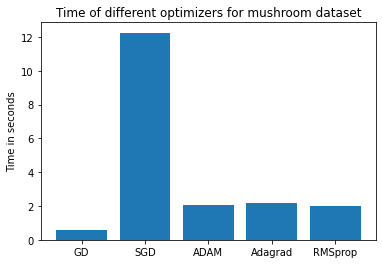

In [56]:
fig, ax = plt.subplots()

optimiziers = ['GD', 'SGD', "SGD w/ mom", 'ADAM', 'Adagrad', 'RMSprop']
counts = [statistics["mushroom"]["GD"]["time"], 
          statistics["mushroom"]["SGD"]["time"], 
          statistics["mushroom"]["SGD w/ momentum"]["time"]
          statistics["mushroom"]["ADAM"]["time"], 
          statistics["mushroom"]["Adagrad"]["time"], 
          statistics["mushroom"]["RMSprop"]["time"]]
# bar_labels = ['Gradient Descent', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(optimiziers, counts)

ax.set_ylabel('Time in seconds')
ax.set_title('Time of different optimizers for mushroom dataset')

plt.show()

### Aggregate over 100 runs

In [ ]:
import sys
save_stdout = sys.stdout
sys.stdout = open('trash', 'w')
for x in range(0, 100):

        
    random_seed_1 = random.randint(0, 2**32 - 1)
    random_seed_2 = random.randint(0, 2**32 - 1)
    random_seed_3 = random.randint(0, 2**32 - 1)
        
    network = GWUNetwork()
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="GD",batch_size=X.shape[0], epochs=100)
    tot_loss_GD = network.evaluate(X_test, y_test)
    
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="SGD",batch_size=1, epochs=100)
    tot_loss_SGD = network.evaluate(X_test, y_test)
    
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="SGD w/ momentum",batch_size=1, epochs=100)
    tot_loss_SGD_momentum = network.evaluate(X_test, y_test)

    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="ADAM",batch_size=10, epochs=100)
    tot_loss_ADAM = network.evaluate(X_test, y_test)
    
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="RMSprop",batch_size=10, epochs=100)
    tot_loss_rmsprop = network.evaluate(X_test, y_test)               
    
    network = GWUNetwork()
    network.add_seeded(Dense(16, add_bias=False, activation='relu', input_size=X.shape[1]), seed=random_seed_1)
    network.add_seeded(Dense(8, add_bias=False, activation='relu'), seed=random_seed_2)
    network.add_seeded(Dense(1, add_bias=False, activation='sigmoid'), seed=random_seed_3)
    network.compile(loss='log_loss', lr=.0001)
    network.fit(X_train, y_train, optimizer="Adagrad",batch_size=10, epochs=100)
    tot_loss_adagrad = network.evaluate(X_test, y_test)
                                         
    statistics["mushroom"]["GD_100"] += tot_loss_GD
    statistics["mushroom"]["GD_100_Normalized"] += (tot_loss_GD / tot_loss_GD)
                                         
                                             
    statistics["mushroom"]["SGD_100"] += tot_loss_SGD
    statistics["mushroom"]["SGD_100_Normalized"] += (tot_loss_SGD / tot_loss_GD)
    
                                                 
    statistics["mushroom"]["SGD_momentum_100"] += tot_loss_SGD
    statistics["mushroom"]["SGD_momentum_100_Normalized"] += (tot_loss_SGD / tot_loss_GD)
    
                                             
    statistics["mushroom"]["ADAM_100"] += tot_loss_ADAM
    statistics["mushroom"]["ADAM_100_Normalized"] += (tot_loss_ADAM / tot_loss_GD)
                                         
                                             
    statistics["mushroom"]["RMSprop_100"] += tot_loss_rmsprop
    statistics["mushroom"]["RMSprop_100_Normalized"] += (tot_loss_rmsprop / tot_loss_GD)
                                        
    statistics["mushroom"]["Adagrad_100"] += tot_loss_adagrad
    statistics["mushroom"]["Adagrad_100_Normalized"] += (tot_loss_adagrad / tot_loss_GD)
                                         
    
sys.stdout = save_stdout
                                                                                 
statistics["mushroom"]["GD_100"] /= 100
statistics["mushroom"]["GD_100_Normalized"] /= 100

statistics["mushroom"]["SGD_100"] /= 100
statistics["mushroom"]["SGD_100_Normalized"] /= 100

statistics["mushroom"]["SGD_momentum_100"] /= 100
statistics["mushroom"]["SGD_momentum_100_Normalized"] /= 100

statistics["mushroom"]["ADAM_100"] /= 100
statistics["mushroom"]["ADAM_100_Normalized"] /= 100


statistics["mushroom"]["RMSprop_100"] /= 100
statistics["mushroom"]["RMSprop_100_Normalized"] /= 100

statistics["mushroom"]["Adagrad_100"] = statistics["mushroom"]["Adagrad_100"] / 100
statistics["mushroom"]["Adagrad_100_Normalized"] /= 100

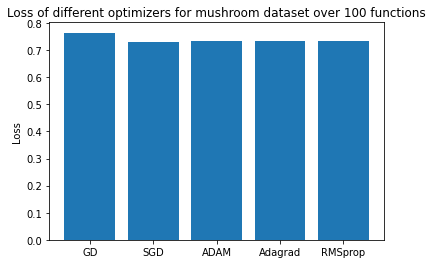

In [66]:
fig, ax = plt.subplots()
optimiziers = ['GD', 'SGD', 'SGD w/ mom', 'ADAM', 'Adagrad', 'RMSprop']
counts = [statistics["mushroom"]["GD_100"], 
          statistics["mushroom"]["SGD_100"], 
          statistics["mushroom"]["SGD_momentum_100"],
          statistics["mushroom"]["ADAM_100"], 
          statistics["mushroom"]["Adagrad_100"], 
          statistics["mushroom"]["RMSprop_100"]]
# bar_labels = ['Gradient Descent', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(optimiziers, counts)

ax.set_ylabel('Loss')
ax.set_title('Loss of different optimizers for mushroom dataset over 100 functions')

plt.show()

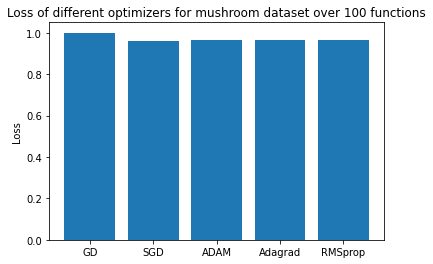

In [68]:
fig, ax = plt.subplots()
optimiziers = ['GD', 'SGD', 'ADAM', 'Adagrad', 'RMSprop']
counts = [statistics["mushroom"]["GD_100_Normalized"], 
          statistics["mushroom"]["SGD_100_Normalized"],
          statistics["mushroom"]["SGD_momentum_100_Normalized"],
          statistics["mushroom"]["ADAM_100_Normalized"], 
          statistics["mushroom"]["Adagrad_100_Normalized"], 
          statistics["mushroom"]["RMSprop_100_Normalized"]]
# bar_labels = ['Gradient Descent', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(optimiziers, counts)

ax.set_ylabel('Loss')
ax.set_title('Loss of different optimizers for mushroom dataset over 100 functions')

plt.show()